In [4]:
%matplotlib inline

import os
import sys
import pandas as pd
import numpy as np
from scipy.stats import entropy
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
src_path = '{}/src'.format(module_path)
if module_path not in sys.path:
    sys.path.append(src_path)

plt.rcParams.update({'figure.max_open_warning': 0})

## Carregando base e transformando colunas em categórico

In [2]:
ndp_path = '{}/data/processed/d_dataset_ndp.csv'.format(module_path)
dp_path = '{}/data/processed/d_dataset_dp.csv'.format(module_path)

df_ndp = pd.read_csv(ndp_path)
df_dp = pd.read_csv(dp_path)

# Transformando em categórico
df_ndp = df_ndp.astype('category')

## Execução do KModes

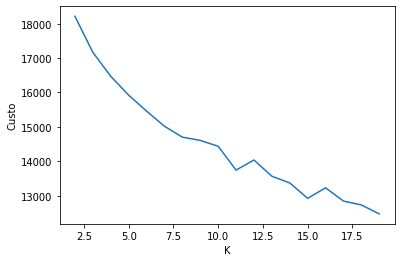

In [16]:
x = [i for i in range(2, 20)] # valores de k
y = [] # Custos para cada valor de k
for k in x:
    km = KModes(n_clusters=k, init='Huang', n_init=10, verbose=0)
    km.fit_predict(df_ndp)
    y.append(km.cost_)

plt.plot(x, y)
plt.ylabel('Custo')
plt.xlabel('K')
plt.show()

In [7]:
k = 4 # Quantidade de clusters
km = KModes(n_clusters=k, init='Huang', n_init=100, verbose=0)
labels = km.fit_predict(df_ndp)
centroids = km.cluster_centroids_

# Classificações em cada cluster
cluster = [ { 'size': 0, 'dp': 0, 'ndp': 0 }  for _ in range(k) ]
for instance, label in enumerate(labels):
    cluster[label]['size'] += 1
    
    if df_dp.iloc[instance].Diagnosticado_Depressao == 1:
        cluster[label]['dp'] += 1
    else:
        cluster[label]['ndp'] += 1
        
# Probabilidades c/ depressão e s/ depressão por cluster
prob = [ [ cluster[i]['dp'] / cluster[i]['size'], 
           cluster[i]['ndp'] / cluster[i]['size']
         ] for i in range(k) ]

for p in prob:
    print(entropy(p))

0.679778902103923
0.6384698816019849
0.6743878150686079
0.4261626606619693
